In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import warnings

In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 6.5 MB/s eta 0:00:16
   ---------------------------------------- 0.9/99.8 MB 9.8 MB/s eta 0:00:11
    --------------------------------------- 1.6/99.8 MB 11.2 MB/s eta 0:00:09
    --------------------------------------- 2.3/99.8 MB 12.1 MB/s eta 0:00:09
   - -------------------------------------- 2.9/99.8 MB 13.3 MB/s eta 0:00:08
   - -------------------------------------- 3.5/99.8 MB 13.2 MB/s eta 0:00:08
   - -------------------------------------- 4.2/99.8 MB 12.7 MB/s eta 0:00:08
   -- ------------------------------------- 5.0/99.8 MB 13.4 MB/s eta 0:00:08
   -- ------------------------------------- 5.5/99.8 MB 13.1 MB/s eta 0:00:08
   -- ------------------------------------- 6.1/99.8 MB 13.0 MB/s eta 0:00:08
   -- ------------------------------------- 6.5/99.8 MB 12.9 MB/s eta 0:00:08
   -- ------------------------------------- 7.0/99.8 MB 12.9 MB/s eta 0:00

In [6]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
encoder = LabelEncoder()

In [9]:
for i in df.columns:
  if df[i].dtype == 'object':
     df[i]=encoder.fit_transform(df[i])


In [10]:
df['CryoSleep']=encoder.fit_transform(df['CryoSleep'])
df['VIP']=encoder.fit_transform(df['VIP'])
df['Transported']=encoder.fit_transform(df['Transported'])

In [11]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,0
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,1
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,0
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,0
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,3524,0
8689,8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780,0
8690,8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002,1
8691,8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596,0


In [12]:
X = df.drop('Transported', axis = 1)
Y = df['Transported']

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X

array([[-1.73185157,  0.32524452, -0.74173569, ..., -0.27373585,
        -0.26609771,  0.36833054],
       [-1.73145308, -0.83303104, -0.74173569, ...,  0.20926721,
        -0.22769155,  0.06830432],
       [-1.73105459,  0.32524452, -0.74173569, ...,  5.63403389,
        -0.22332722, -1.54983708],
       ...,
       [ 1.73105459, -0.83303104, -0.74173569, ..., -0.27285607,
        -0.26609771, -0.53174811],
       [ 1.73145308,  0.32524452, -0.74173569, ...,  0.03682896,
         2.55762723, -1.09419726],
       [ 1.73185157,  0.32524452, -0.74173569, ..., -0.27373585,
        -0.2556233 ,  0.81956997]])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return mae, rmse, mse

In [24]:
models = {
    "XGboost regressor": XGBRegressor(),

}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae = evaluate_model(Y_train,Y_train_pred)

    model_test_rmse = evaluate_model(Y_test, Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print(model_train_mae)

    print("----------------------------------------")

    print("Model performance for test set")
    print(model_test_rmse)




XGboost regressor
Model performance for training set
(0.12611168046361762, 0.1825188901982697, 0.033313145279208034)
----------------------------------------
Model performance for test set
(0.28707078185620427, 0.39260442809214136, 0.1541382369575574)


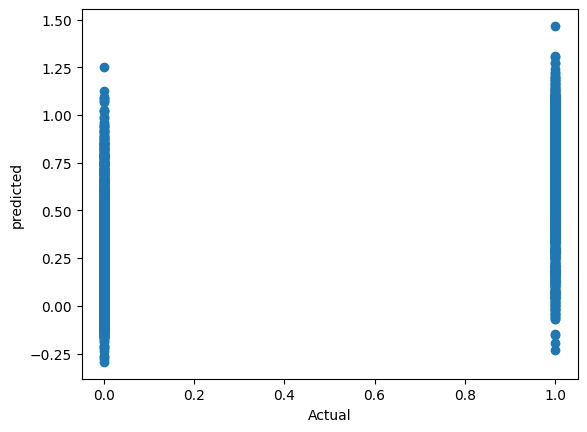

In [25]:
plt.scatter(Y_test, Y_test_pred);
plt.xlabel('Actual')
plt.ylabel("predicted");